<h1 style="text-align: center;"><b>3.Prescriptive Analysis</b></h1>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter("ignore", UserWarning)

In [10]:
clean_df = pd.read_csv(r"C:\Febi\NumpyNinja\Hackathon\Python_Launch Folder\Team12_Pytesters_PythonHackathon_August25\merged_cleandata.csv")

### Find carb_intake or insulin recommendations for each patient with Type 1 Diabetes based on their glucose to carb_intake

#### Reasoning: To generate personalized carb/insulin recommendations for all patients to optimize postprandial glucose control.

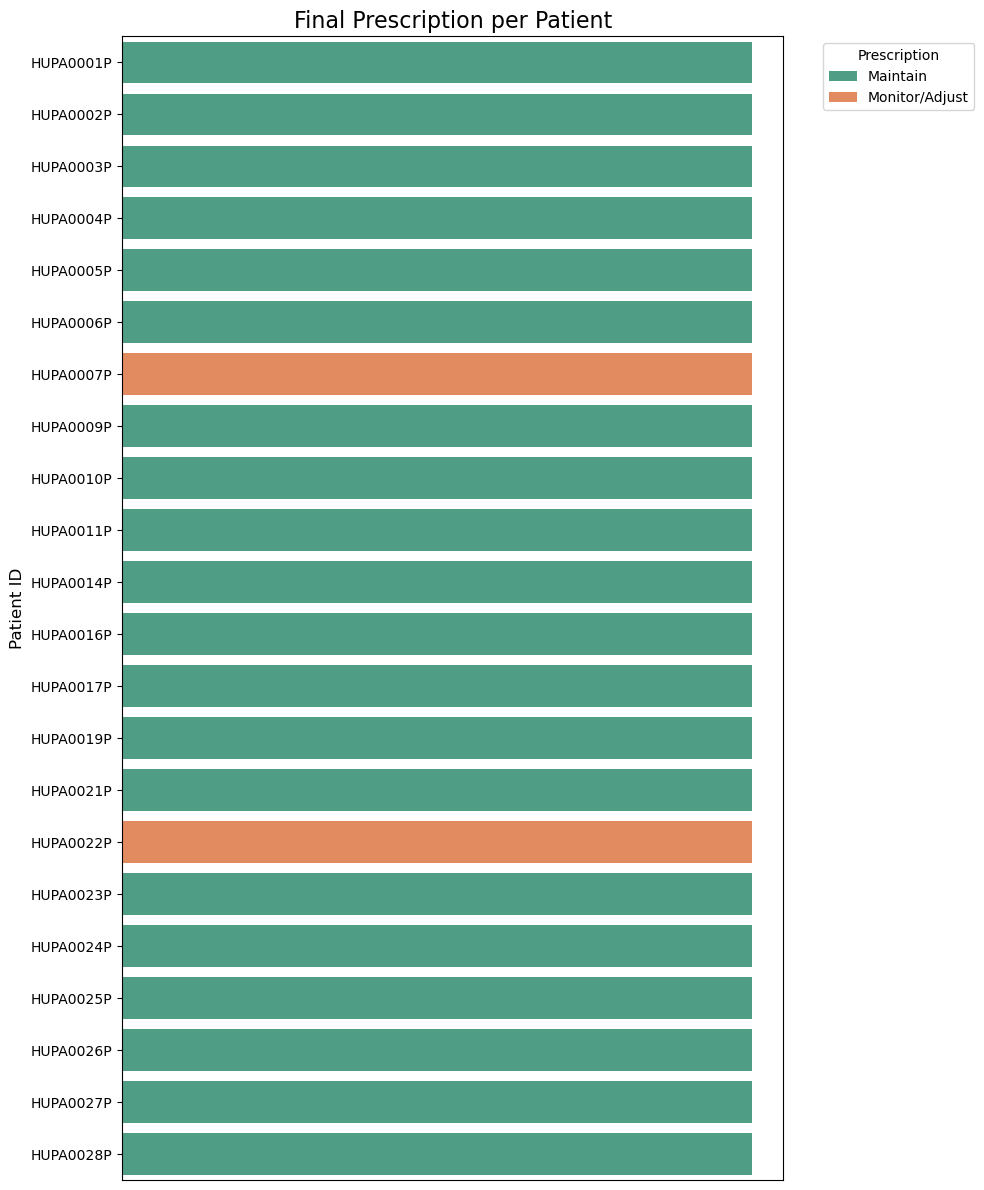

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore", UserWarning)

def insulin_optimization_recommendations(clean_df):

    # Step 1: Calculate glucose change
    clean_df['next_glucose'] = clean_df.groupby('patient_id')['glucose'].shift(-1)
    clean_df['glucose_change'] = clean_df['next_glucose'] - clean_df['glucose']

    # Step 2: Define prescription logic
    def prescribe_action(change):
        if change > 50:
            return 'Reduce Carb or Delay Insulin'
        elif change < -30:
            return 'Add Rescue Carbs'
        elif -10 <= change <= 10:
            return 'Maintain'
        else:
            return 'Monitor/Adjust'

    # Step 3: Filter relevant data and apply prescription
    carb_effect = clean_df[
        (clean_df['carb_input'] > 0) &
        (clean_df['glucose_change'].notnull())
    ].copy()

    carb_effect['prescription'] = carb_effect['glucose_change'].apply(prescribe_action)

    # Step 4: Get final prescription per patient
    final_prescription = carb_effect.groupby('patient_id')['prescription'] \
        .agg(lambda x: x.value_counts().idxmax()).reset_index()
    final_prescription.columns = ['Patient ID', 'Final Prescription']

    # Step 5: Sort by numeric part of Patient ID
    final_prescription_sorted = final_prescription.copy()
    final_prescription_sorted['Patient_Num'] = final_prescription_sorted['Patient ID'].str.extract(r'(\d+)').astype(int)
    final_prescription_sorted = final_prescription_sorted.sort_values('Patient_Num')

    # Define color palette
    palette = {
        'Reduce Carb or Delay Insulin': '#f94144',
        'Add Rescue Carbs': '#277da1',
        'Maintain': '#43aa8b',
        'Monitor/Adjust': '#f9844a'
    }

    # Step 6: Plot
    plt.figure(figsize=(10, 12))

    sns.barplot(
        data=final_prescription_sorted,
        y='Patient ID',
        x=[1]*len(final_prescription_sorted),  # Dummy x values for bars of equal length
        hue='Final Prescription',
        palette=palette,
        dodge=False
    )

    plt.title("Final Prescription per Patient", fontsize=16)
    plt.xlabel("")  # No x-label since it is dummy
    plt.ylabel("Patient ID", fontsize=12)
    plt.xticks([])  # Hide x-axis ticks
    plt.legend(title="Prescription", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return final_prescription
    
prescription_summary = insulin_optimization_recommendations(clean_df)
